<a href="https://colab.research.google.com/github/MNoichl/opinionated/blob/master/opinionated_trial_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slightly prettier plots in colab, the easy way

First, we make the standard plot. It's not that pretty... 😞

Text(0.5, 1.0, 'Some Data')

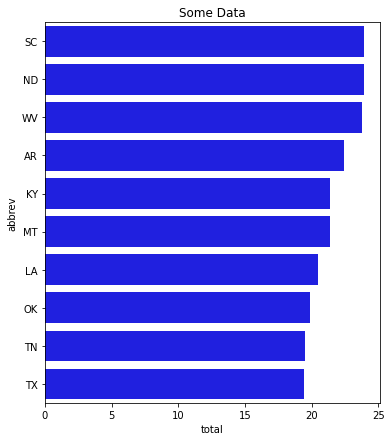

In [ ]:
import seaborn as sns
from matplotlib import font_manager as fm, pyplot as plt
import shutil
import matplotlib

#Loading the data:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)[0:10]


f, ax = plt.subplots(figsize=(6, 7))
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total",color='b')
plt.title('Some Title')
ax.set_title('Some Data')

Then we download the custom stylesheet I made for Samuli. It's inspired by [this R-package](https://github.com/hrbrmstr/hrbrthemes). We also download all the google-fonts. This is somewhat overkill, and takes half a minute but why not... 😎


In [ ]:
!wget -q https://raw.githubusercontent.com/MNoichl/uti/main/opinions.mplstyle -O opinions.mplstyle
plt.style.use("opinions.mplstyle")

In [ ]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

def install_google_fonts(print_out= False, download = False):
  if download:
    !wget https://github.com/google/fonts/archive/main.zip
    !unzip -q main.zip -d all_the_google_fonts

  font_files = fm.findSystemFonts('.')
  for font_file in font_files:
    try:
      fm.fontManager.addfont(font_file)
    except:
      pass

  if print_out:
    from IPython.core.display import HTML
    code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

    display(HTML("<div style='column-count: 2;'>{}</div>".format(code)))

install_google_fonts(print_out= False, download = True)

--2023-03-02 00:28:41--  https://github.com/google/fonts/archive/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/google/fonts/zip/refs/heads/main [following]
--2023-03-02 00:28:41--  https://codeload.github.com/google/fonts/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [          <=>       ]   1.02G  9.73MB/s    in 2m 2s   

2023-03-02 00:30:43 (8.56 MB/s) - ‘main.zip’ saved [1098924931]



Then we do the exact same thing as above again, but change the color, and add a little transparancy...

The result is by no means perfect, but isn't it already a lot prettier? 🤩

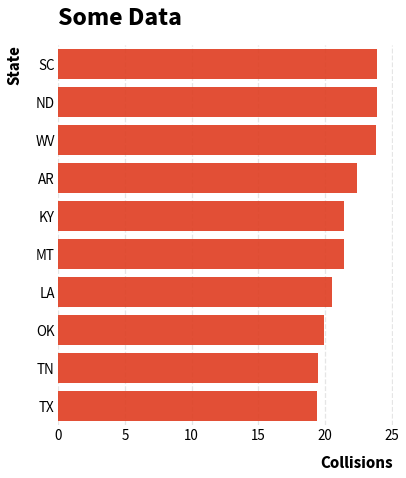

In [ ]:
f, ax = plt.subplots(figsize=(6, 7))
plt.style.use("opinions.mplstyle")
# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
# plt.rc('font', family='Roboto Condensed') 


sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data')
ax.set_ylabel("State")
ax.set_xlabel("Collisions")

# Now lets save with good defaults:
plt.savefig('my_sample_plot.png',bbox_inches='tight',dpi =400, transparent=False)

That's it! If you have ideas for how to improve the stylesheet, please tell me!